In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
user_behavior_logs = pd.read_csv('dataset/user_behavior_logs.csv', parse_dates=['behavior_time'])

In [3]:
df=user_behavior_logs

In [5]:
df['hour']=df['behavior_time'].dt.hour

In [7]:
df['hour'].describe()

count    5.578127e+07
mean     1.341194e+01
std      5.716200e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.400000e+01
75%      1.800000e+01
max      2.300000e+01
Name: hour, dtype: float64

In [10]:
hour=[0]*24
for i in range(24):
    hour[i]=df.loc[df['hour'] == i].count()['hour']

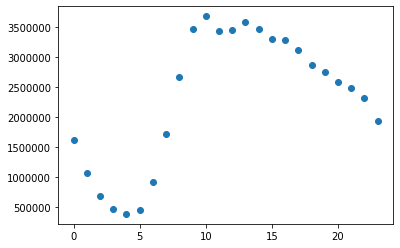

In [11]:
hours=[i for i in range(24)]
plt.scatter(hours,hour)

In [12]:
df.head()

,user_id,behavior_time,behavior_type,hour
0,842439,2018-09-13 23:17:21,3,23
1,842439,2018-09-13 23:17:21,3,23
2,905214,2018-09-13 15:19:30,3,15
3,905214,2018-09-13 15:19:30,3,15
4,842439,2018-09-13 23:17:21,3,23


In [13]:
user=pd.unique(df['user_id'])

In [18]:
len(user)/5.578127e+07

0.016495877558901043

In [20]:
new_hour_mean=df.groupby('user_id')['hour'].mean()

In [24]:
new_hour_mean.columns=['user_id','hour_mean']

In [36]:
new_hour_mean = pd.DataFrame(new_hour_mean)

In [39]:
new_hour_mean.columns=['hour_mean']

In [42]:
new_hour_mean.describe()

,hour_mean
count,920161.000000
mean,13.546717
std,2.475187
min,0.000000
25%,12.185185
50%,13.535211
75%,14.958904
max,23.000000


In [49]:
new_hour_mean['hour_mean'] =(new_hour_mean['hour_mean'] + .00501)// .01 //100

In [50]:
hour_mean=[0]*24
for i in range(24):
    hour_mean[i]=new_hour_mean.loc[new_hour_mean['hour_mean'] == i].count()['hour_mean']

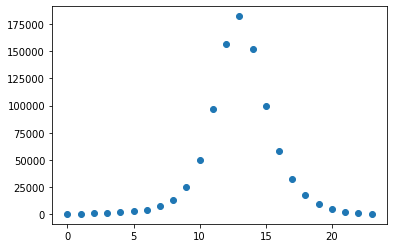

In [55]:
hours=[i for i in range(24)]
plt.scatter(hours,hour_mean)

In [52]:
hour_mean

[314,
 462,
 758,
 1214,
 1896,
 2884,
 4362,
 7248,
 12768,
 25033,
 49587,
 96529,
 156276,
 182252,
 152024,
 99462,
 58519,
 32852,
 18008,
 9611,
 4673,
 2123,
 907,
 399]

In [53]:
hour

[1620805,
 1061751,
 690519,
 470527,
 382922,
 455802,
 924311,
 1718859,
 2668755,
 3468870,
 3686128,
 3437952,
 3451637,
 3589636,
 3478569,
 3314160,
 3286681,
 3123127,
 2868132,
 2748177,
 2588683,
 2485095,
 2320411,
 1939762]

In [57]:
new_hour_mean['hour_mean'].describe()

count    920161.000000
mean         13.066443
std           2.494660
min           0.000000
25%          12.000000
50%          13.000000
75%          14.000000
max          23.000000
Name: hour_mean, dtype: float64